<a href="https://colab.research.google.com/github/AppleTater/Jinkerson-Lab-Research/blob/master/Copy_of_Multi_Level_%2B_Histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Files that need to be uploaded**


---
* large-lib_full_2016.10.25.csv
* TAG Data.csv


# Libraries



In [ ]:
%reload_ext rpy2.ipython

# %%R
# library(ggplot2)

import rpy2.robjects as robjects                          # common rpy2 objects under the abbreviation 'robjects'
from rpy2.robjects.packages import importr                # rpy2 packages under the abbreviation 'importr'
from rpy2.robjects.vectors import FloatVector             # rpy2 for float conversion
import gc                                                 # rpy2 library
R_stats = importr('stats',  robject_translations={'format_perc': '_format_perc'})                                
# rpy2 stats

from io import StringIO

from rpy2.rinterface_lib.sexp import StrSexpVector        # rpy2 interface
from functools import partial                             # rpy2 tools under the abbreviation 'partial'
from rpy2.ipython import html                             # html support
html.html_rdataframe=partial(html.html_rdataframe, table_class="docutils")

from rpy2.robjects.conversion import localconverter       # rpy2 converter under the abbreviation 'localconverter'  

import pandas as pd                                       # these libraries are for redundancy
import rpy2.robjects as ro                                # ↓
from rpy2.robjects.packages import importr                # ↓
from rpy2.robjects import pandas2ri                       # ↓


In [ ]:
import pandas as pd                                       # importing common pandas libraries under the abbreviation 'pd' 
import matplotlib.pyplot as plt                           # was for the requested histogram under the abbreviation 'plt' 

import numpy.matlib                                       # to calculate mean and median
import numpy as np                                        # numpy under the abbreviation 'np' 
from numpy import median                                  # from the numpy library, import how to get the median

import scipy.stats as stats                               # libraries used for BH adjustment under the abbreviation 'stats' 
import scipy.special                                      # special libraries from scipy

import re                                                 # more libraries
import sys                                                # more libraries

from IPython.display import (                             # display data, if wanted, as different media file types
    display_pretty, display_html, display_jpeg,
    display_png, display_json, display_latex, display_svg
)

from IPython.display import display                       # more display tools
import itertools                                          # more display tools
import gc                                                 # more display tools

import statsmodels.api as sm                              # stats models under the abbreviation 'sm'
import statsmodels.stats.multitest as smm                 # stats models under the abbreviation 'smm'
import statsmodels.formula.api as smf                     # stats models under the abbreviation 'smf'

import random

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Histograms

In [ ]:
# CHANGE COMPARISONS                                                            # left_histogram_comparison / right_histogram_comparison
left_histogram_comparison = ["R5-S#11-HLG_WHOLE_normalized_reads", "R5-S#15-HLG_WHOLE-D_normalized_reads", "R5-S#17-HLG_WHOLE-C_normalized_reads", 
                             "R5-S#18-HLG_WHOLE-A_normalized_reads", "R6-S#19-HLG_WHOLE-A_normalized_reads", "R6-S#21-HLG-400_WHOLE-B_normalized_reads", 
                             "R6-S#21-HLG-4waypurity_WHOLE-B_normalized_reads", "R6-S#22-HLG_WHOLE-C_normalized_reads"]
right_histogram_comparison = ["R5-S#11-ALL_WHOLE_normalized_reads", "R5-S#15-ALL_WHOLE-D_normalized_reads", "R5-S#17-ALL_WHOLE-C_normalized_reads", 
                              "R5-S#18-ALL_WHOLE-A_normalized_reads", "R6-S#19-ALL_WHOLE-A_normalized_reads", "R6-S#21-ALL_WHOLE-B_normalized_reads", 
                              "R6-S#21-ALL_WHOLE-B_normalized_reads", "R6-S#22-ALL_WHOLE-C_normalized_reads"]
                            #[“R5-S#11-ALL_WHOLE_normalized_reads”, “R5-S#15-ALL_WHOLE-D_normalized_reads”, “R5-S#17-ALL_WHOLE-C_normalized_reads”, 
                            # “R5-S#18-ALL_WHOLE-A_normalized_reads”, “R6-S#19-ALL_WHOLE-A_normalized_reads”, “R6-S#21-ALL-400_WHOLE-B_normalized_reads”, 
                            # “R6-S#21-ALL-4waypurity_WHOLE-B_normalized_reads”, “R6-S#22-ALL_WHOLE-C_normalized_reads”]  
# CHANGE RANGE FOR HISTOGRAM
more_histogram = [0]                                                            # more_histogram < histogram data
less_histogram = [10]                                                           # less_histogram > histogram data

# BINS
no_of_bins = [10]                                                           # number of histogram bins

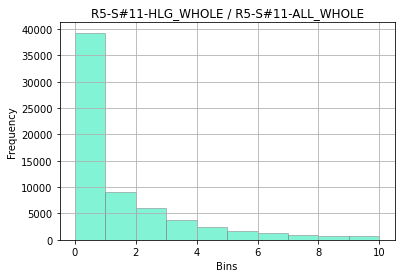

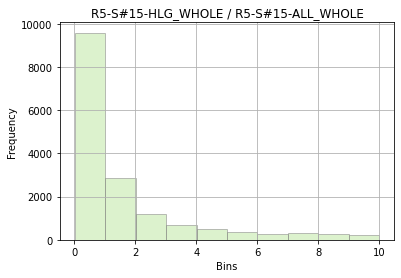

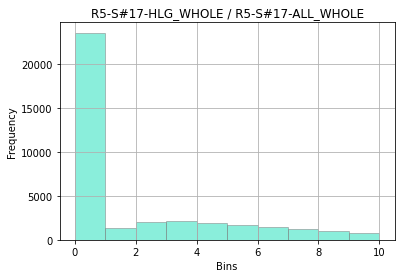

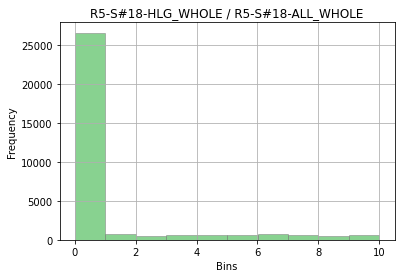

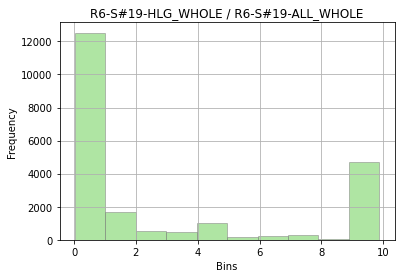

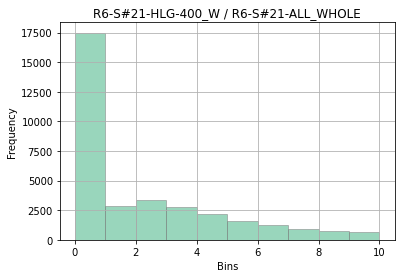

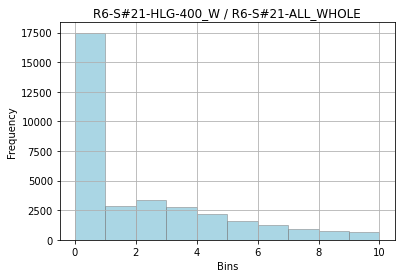

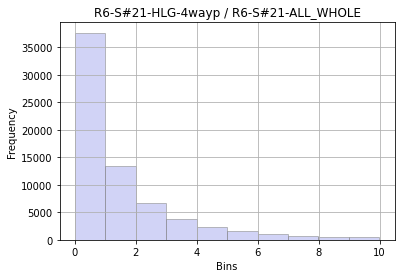

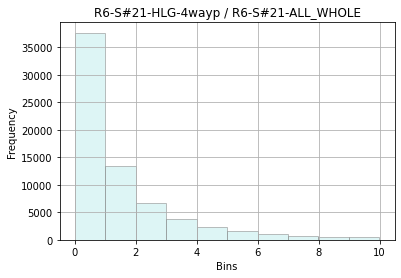

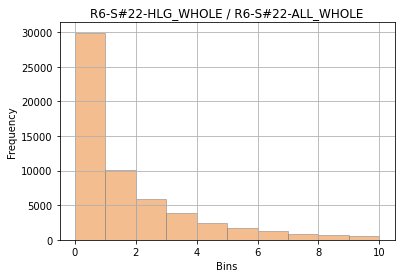

In [ ]:
tag = pd.read_csv("TAG Data.csv")
pd.options.mode.chained_assignment = None  # default='warn'

for bin in no_of_bins:
  for more in more_histogram:
    for less in less_histogram:
      for num in left_histogram_comparison:
        for denom in right_histogram_comparison:
          char_7_left = num[0 : 7]
          char_7_right = denom[0 : 7]
          if (char_7_left == char_7_right):
            # RANDOM COLORS                                                     # random color generator for unique histogram colors
            r = random.random()
            b = random.random()
            g = random.random()
            color = (r, g, b)

            tag_df = tag[['gene', num, denom]]
            tag_ratios = "Ratios: " + str(num) + " / " + str(denom)            # string, tag_ratios store "Ratios: left / right"
            tag_df[tag_ratios] = tag_df[num] / tag_df[denom]                   # new column in tag_df

            filter_more = tag_df[tag_ratios] > more                             # filter with restriction on data's data_ratio column that all values must be greater than user inputted value
            filter_less = tag_df[tag_ratios] < less                             # filter with restriction on data's data_ratio column that all values must be less than user inputted value

            tag_df.where(filter_more & filter_less, inplace = True)             # apply the filters
            tag_df = tag_df[[tag_ratios]].dropna()                              # drop 'NaN', ungraphable(?)

            char_17_left = num[0 : 17]
            char_17_right = denom [0 : 17]
            ax = tag_df.plot.hist(color = color, edgecolor = 'gray', bins = bin, grid = True, alpha = 0.5, legend = False, title = char_17_left + " / " + char_17_right)
            ax.set_xlabel("Bins")
            
            #screen_num = char_7_left[5 : 7]
            #name = "screen_" + str(screen_num) + "_hist_range_" + str(more) + "_" + str(less) + ".png"
            name = num + ".png"

            ax.figure.savefig(name)

# Run for hours Multi-Level


In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1jCCvnPMcBMxzv-rfU3zznkCgC1GNtn9B3yQfgxrSCyc/edit#gid=0')

sheet = wb.worksheet('Sheet1')
data_from_sheet = sheet.get_all_values()

data_from_sheet_df = pd.DataFrame(data_from_sheet)
data_from_sheet_df.columns = data_from_sheet_df.iloc[0]
data_from_sheet_df = data_from_sheet_df.iloc[1:]

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

import numpy as np
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()

stats = importr('stats')

tag = pd.read_csv('TAG Data.csv')                                               # read in 'TAG Data.csv'
lib = pd.read_csv('large-lib_full_2016.10.25.csv')                              # read in 'large-lib_full_2016.10.25.csv' 

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

left_sheet = [left_comparison for left_comparison in data_from_sheet_df['Left_Comparison'].tolist() if left_comparison != ""] 
right_sheet = [right_comparison for right_comparison in data_from_sheet_df['Right_Comparison'].tolist() if right_comparison != ""] 
mutant_sheet = [sheet_mutant for sheet_mutant in data_from_sheet_df["Mutant Cut-off"].unique().tolist() if sheet_mutant != ""] 
confidence_sheet = [sheet_confidence for sheet_confidence in data_from_sheet_df["Confidence Cut-off"].unique().tolist() if sheet_confidence != ""]
bin_sheet = [sheet_bin for sheet_bin in data_from_sheet_df["Bins"].unique().tolist() if sheet_bin != ""]

# EMPTY DICTIONARIES AND LISTS
range_dict = {}                                                                 # empty dictionary to hold variable number of ranges for the variable number of bins
bin_range_list = []                                                             # empty list to hold the range, to create a list of the bin ranges
multi_level = pd.DataFrame()                                                    # empty dataframe to hold the hierarchical column headers
range_list = []
screens = []

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# ↓ Benjamini-Hochberg Adjustment of p-values ↓
# calls on a statisical adjustment from an R library:
def FDR_adjust_pvalues(case, N=None, method='BH'):
    """ Adjust a list of p-values for false discovery rate using R's stats::p.adjust function.

    N and method are passed to R_stats.p_adjust:
    - N is the number of comparisons (if left unspecified, defaults to len(pvalue_list), I think)
    - method is the name of the adjustment method to use (inherited from R)

    Note that this MUST be done after all the p-values are already collected, on the full list of p-values at once:
    trying to do it on single p-values, even with adjusted N, will give different results!
    """
    if not method in R_stats.p_adjust_methods:
        raise ValueError("Unknown method %s - method must be one of (%s)!"%(method, ', '.join(R_stats.p_adjust_methods)))
    if N is None:   return R_stats.p_adjust(FloatVector(case), method=method)
    else:           return R_stats.p_adjust(FloatVector(case), method=method, n=N)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

bin_confidence = []
for x in confidence_sheet:
  confidence_sheet = int(x)
  bin_confidence.append(confidence_sheet)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

bin_count = []
for x in mutant_sheet:
  mutant_sheet = int(x)
  bin_count.append(mutant_sheet)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

for left in left_sheet:
  for right in right_sheet:
    char_7_left = left[0 : 7]
    char_7_right = right[0 : 7]
    if (char_7_left == char_7_right):
      # for 'TAG Data.csv'
      tag_df = tag [['gene', 'IB', left , right]]
      # keep only the listed columns
      tag_df = tag_df.loc[~((tag_df['gene'] == "unknown_chrom") | (tag_df['gene'] == "gene_unknown")),:]
      # drop rows that have 'unknown_chrom' or 'gene_unknown' as gene values
      tag_df = tag_df[~tag_df.gene.str.contains (" & ")]                              # drop rows that have an ampersand (sometimes the gene names are 2, joined by an ampersand)
      tag_df.reset_index(drop = True)                                                 # reset index

      # for 'large-lib_full_2016.10.25.csv'
      lib_df = lib[['gene', 'IB', 'confidence_level' ]]
      # keep only the listed columns
      lib_df = lib_df.loc[~((lib_df['gene'] == "unknown_chrom") | (lib_df['gene'] == "gene_unknown")),:]
      # drop rows that have 'unknown_chrom' or 'gene_unknown' as gene values
      lib_df = lib_df[~lib_df.gene.str.contains (" & ")]                              # drop rows that have an ampersand (sometimes the gene names are 2, joined by an ampersand)
      lib_df = lib_df.reset_index(drop = True)                                        # reset index

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

      for y in bin_sheet:
        bin_range_list = []
        y = y [1:-1]
        string = y
        bin_sheet_float = [float(y) for y in string.split(',')]
        def get_number_of_elements(list):
          count = 0
          for element in bin_sheet_float:
              count += 1
          return count
        elements_in_bin_sheet = get_number_of_elements(bin_sheet_float)

        for j in range(elements_in_bin_sheet):
          increased_j = j + 1  
          if (j == 0):
            bin_min = bin_sheet_float[j]
            bin_max = bin_sheet_float[j + 1]
            bin_range = (str(bin_min) + " ≤ x ≤ " + str(bin_max))
            range_dict['bin_range_' + str(increased_j)] = bin_range
            locals().update(range_dict)
            
          if (j == elements_in_bin_sheet - 1):
            bin_min = bin_sheet_float[j]
            bin_range= ("x > " + str(bin_min))
            range_dict['bin_range_' + str(increased_j)] = bin_range
            locals().update(range_dict)
            bin_range_list.append(bin_min)
            break
          
          else: 
            bin_min = bin_sheet_float[j]
            bin_max = bin_sheet_float[j + 1]
            bin_range = (str(bin_min) + " < x ≤ " + str(bin_max)) 
            bin_range_list.append(bin_min)
          range_dict['bin_range_' + str(increased_j)] = bin_range
          locals().update(range_dict)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

        merged = tag_df.merge(lib_df, on = "IB")                                        # merge tag_df to lib_df based on their IB
        merged ['Ratios: HLG / ALL (Whole)'] = merged [left] / merged[right]
        # calculate HLG / ALL for ratio      
        merged = merged.replace([np.inf, -np.inf], 9999.999999)
        merged = merged.drop(columns = {'gene_y', left, right})
        # drop listed columns
        merged["Bin Type"] = ""                                                         # empty column in merged, "Bin Type"

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------      

        string_ranges = str(range_dict.values())                                        # convert range dictionary values to strings, store in string_ranges
        list_ranges = re.findall("\d+\.\d+", string_ranges)                             # find instances of decimals 

        range_frame = pd.DataFrame(list_ranges, columns = ["Value"])                    # create dataframe from list_ranges, range_frame
        range_frame_even = range_frame[range_frame.index % 2 == 0].reset_index(drop = True)
        # range_frame_even = where range_frame's index is not odd (implies minimum value of the range)
        range_frame_odd = range_frame[range_frame.index % 2 == 1].reset_index(drop = True)
        # range_frame_odd = where range_frame's index is odd (implies maximum value of the range), for last bin, where there is no maximum, stores "NaN"
        range_frame = pd.concat([range_frame_even, range_frame_odd], axis = 1)          # concatenate range_frame_even and range_frame_odd side by side
        range_frame.columns = ['Min', 'Max']                                            # rename columns to "Min" and "Max"
        range_frame = range_frame.replace(np.nan, np.inf)                               # replace "NaN", by "inf" (infinity)

        range_frame['Min'] = range_frame['Min'].astype(float)                           # convert column values back to floats
        range_frame['Max'] = range_frame['Max'].astype(float)                           # convert column values back to floats
        def conditions(merged):                                                         # define function, "conditions" to be run on merged
          for i in range(elements_in_bin_sheet):                                               # beginning of for loop, for every i in the number of bins...                                               
            if ((range_frame.iloc[i, 0] <= merged["Ratios: HLG / ALL (Whole)"]) & (merged["Ratios: HLG / ALL (Whole)"] <= range_frame.iloc[i, 1])):
            # if merged["Ratios: HLG / ALL (Whole)"] is >= value in range_frame.iloc[i,0] (the minimum) & merged["Ratios: HLG / ALL (Whole)"] is <= range_frame.iloc[i, 1] (the maxmimum)
              return i + 1                                                              # return i + 1 (if i = 1, return 2)
            if ((range_frame.iloc[i, 0] <= merged["Ratios: HLG / ALL (Whole)"]) & (range_frame.iloc[i,1] == np.inf)):
            # if merged["Ratios: HLG / ALL (Whole)"] is >= value in range_frame.iloc[i,0] (the minimum) & range_frame.iloc[i, 1] == inf (infinity), remember one instance of no maxmimum
              return elements_in_bin_sheet + 1                                                 # return number_of_bins + 1
        merged["Bin Type"] = merged.apply(conditions, axis = 1)                         # on merged["Bin Type"], apply conditions
        merged = merged.rename(columns = {'gene_x' : 'Gene', 'confidence_level' : "Confidence Level"}).reset_index(drop = True)

        gene_only_arr = merged["Gene"].unique()
        gene_only_df = pd.DataFrame()
        gene_only_df["Gene"] = pd.Series(gene_only_arr)
        gene_only_df = gene_only_df.sort_values(by = ["Gene"]).reset_index(drop = True)

        merged = merged.sort_values('Gene').replace([np.inf, -np.inf], np.nan).dropna()
        merged["Bin Type"] = merged["Bin Type"].astype(int)
        for count in bin_count:
          for confidence in bin_confidence:
            # rename columns1
            new_merged = merged[merged["Confidence Level"] <= confidence]
            # sort the values by the gene name, replace inf by Nan, drop rows that has Nan, reset the index
            new_merged = new_merged.reset_index(drop = True)

            merged_count_drop = pd.DataFrame(data = new_merged['Gene'], columns = ['Gene'])     # new dataframe, merged_count_drop, gets unique genes
            merged_count_drop = new_merged['Gene'].value_counts().to_frame().reset_index().rename(columns = {'index' : 'Gene', 'Gene' : 'Count'})
            # count the number of instances of each gene, stored in a new column, 'Count'
            merged_count_drop = merged_count_drop[merged_count_drop['Count'] >= count].reset_index(drop = True)
            # drop rows that has a count that is less than the inputted count restriction
            merged_count_drop  = merged_count_drop.dropna().sort_values('Gene').reset_index(drop = True)
            # drop rows that have Nan, sort dataframe by gene name, reset index

            clean = new_merged.merge(merged_count_drop, on = "Gene")                            # merge merged and merged_count_drop based on gene name
            
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

            unique_gene = pd.DataFrame(clean['Gene'].unique())                              # dataframe to store the unique gene names
            bin_type = clean[['Gene', "Bin Type"]]                                          # dataframe to store all genes + mutants + bin type

            super_bins = []                                                                 # declare empty list
            xl_p_val = []                                                                   # declare empty list
            for i in range(len(unique_gene)):                                               # for i in the range of the number of rows in unique_genes
              same_gene = bin_type.loc[bin_type.Gene == unique_gene.iloc[i,0]]              # find where the unique gene name dataframe at i equals the bin_type dataframe with all the mutants
              bin_df = pd.DataFrame(same_gene["Bin Type"].value_counts()).reindex(index = range(1, elements_in_bin_sheet + 1)).transpose().fillna(0).astype(int)
              # splice by gene names, count occurrence of every bin number, make columns from 1 - ... for the bin numbers, replace 'NaN' with 0, change from float to integer, switch x and y axis

              bin_df = bin_df.set_index(same_gene['Gene'].unique())                         # make the unique gene names the index

              super_bins.append(bin_df)                                                     # append data to each other, avoid long run times
              # looks like: [Total in: 1 , Total in: 2 , Total in: 3 , Total in: 4 , etc.]
            # end of for loop

            super_bins = pd.concat(super_bins, axis = 0)                                    # concatenate the lists into a dataframe
            super_bins = super_bins.transpose()                                             # switch x and y axis again
            super_bins["Total"] = super_bins.sum(axis = 1)                                  # add up total count in each bin to create the 'Total' 
            super_bins = super_bins.transpose()                                             # switch x and y axis again

            total = super_bins.loc[super_bins.index == 'Total']                             # make total dataframe, and the index name to be 'Total'

            for i in range(len(unique_gene)):                                               # for i in the range of the number of rows in unique_genes
              same_gene = super_bins.loc[super_bins.index == unique_gene.iloc[i,0]]         # find where the unique gene name dataframe at i equals the bin_type dataframe with all the mutants
              
              bin_frames = [same_gene, total]                                               # create a contingency table, 'frame' with the the individual gene bin table and the total
              bin_concat = pd.concat(bin_frames)                                            # concatenate bin_frames ↑
              m = np.array(bin_concat)                                                      # change from dataframe to an array  
              res = stats.fisher_test(m, workspace = 2e+06)                                 # do the r fisher test, and expand workspace since the default, 2+e05 was too small         
              val = format(res[0][0])                                                       # re-format the results

              xl_p_val.append(val)                                                          # append the results to empty list
            # end of for loop

            xl_p_val = pd.DataFrame(xl_p_val, columns = ['p-value'])                        # convert list to dataframe with the column, 'p-value'
            xl_p_val = pd.concat([unique_gene, xl_p_val], axis = 1).rename(columns = {0 : 'Gene'}).set_index('Gene')
            # concatenate the the unique gene names to the p-values, side by side, rename the column, set the index of the dataframe to be the gene name

            super_bins = super_bins.reset_index().rename(columns = {'index' : 'Gene'})      # reset the index of super_bins and rename column
            new_super_bins = gene_only_df.merge(super_bins, how='left', on = "Gene")
            
            xl_p_val = xl_p_val.reset_index()                                               # reset index of xl_p_val
            xl_p_val["Adjusted p-value"] = FDR_adjust_pvalues(xl_p_val["p-value"])
            
            bin_and_p_val = pd.merge(new_super_bins, xl_p_val, how ='left', on = 'Gene').set_index('Gene').fillna(0)
            bin_and_p_val_names = bin_and_p_val.columns.values.tolist()
            del bin_and_p_val_names[-1]
            del bin_and_p_val_names[-1]
            bin_and_p_val[bin_and_p_val_names] = bin_and_p_val[bin_and_p_val_names].astype(int)
            
            # adjust bin_and_p_val["Adjusted p-value"]
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

            bin_and_p_val['Bins'] = bin_and_p_val[bin_and_p_val.columns[0 : elements_in_bin_sheet]].apply(lambda x: ", ".join(x.dropna().astype(str)), axis=1)
            # combines the counts of the mutants inside each bin into one cell, separateed by commas, column name: 'Bins'
            bin_and_p_val = bin_and_p_val[["Bins", "p-value", "Adjusted p-value"]]      # reorder dataframe
            bin_and_p_val = bin_and_p_val.replace({'Bins' : {"0, 0, 0, 0" : np.nan},
                                                  'p-value' : {0: np.nan},
                                                  "Adjusted p-value" : {0 : np.nan}})
            p_val_only = bin_and_p_val['p-value']

            point_three = p_val_only[p_val_only < 0.3].count()
            point_zero_five = p_val_only[p_val_only < 0.05].count()
            
            total["Bins"] = total[total.columns[0 : elements_in_bin_sheet]].apply(lambda x: ", ".join(x.dropna().astype(str)), axis=1)
            total = total[["Bins"]].iloc[[0]]

            short_comp = left[0 : 8] + left[12 : 17]
            tot_in_bins = total[total.columns[0 : elements_in_bin_sheet]].iloc[0,0]
            bin_total = pd.DataFrame(total.Bins.str.split(',').tolist()).transpose()
            bin_total = pd.to_numeric(bin_total[0]).sum()
            
            count_df = pd.DataFrame(data = {count}, columns = {"Read Count"}).transpose()
            # swtich the x and y axes for the count

            confidence_df = pd.DataFrame(data = {confidence}, columns = {"Confidence Level"}).transpose()
            # swtich the x and y axes for the confidence level

            bin_range_df =  pd.DataFrame(bin_range_list, columns = {"Bin Range"}).transpose()
            # swtich the x and y axes for the bin range
            bin_range_df["Bin Range"] = bin_range_df[bin_range_df.columns[0 : elements_in_bin_sheet]].apply(lambda x: ", ".join(x.dropna().astype(str)), axis=1)
            # combines the different range values into one cell
            bin_range_df = bin_range_df[["Bin Range"]].rename(columns = {"Bin Range": 0})
            # rename new column to "Bin Range"

            synopsis = pd.DataFrame([short_comp, count_df.iloc[0,0], confidence_df.iloc[0,0], bin_range_df.iloc[0,0], tot_in_bins, bin_total, point_three, point_zero_five]).rename(columns = {0: "Synopsis"}).transpose()
            synopsis.columns = ['Comparison', "Mutant Cut-off", "Confidence Cut-off", 'Bins', "Totals in Bins", "Total in Bins", "How Many < 0.3", "How Many < 0.05"]

            bin_and_p_val[" "] = ""
            bin_and_p_val["  "] = ""
            bin_and_p_val["   "] = ""
            bin_and_p_val["    "] = ""
            bin_and_p_val["     "] = ""

            tuples = [("Comparison", short_comp, "Bin Counts"), ("Mutant Cut-off", count_df.iloc[0,0], "p-value"), ("Confidence Cut-off", confidence_df.iloc[0,0], "Adjusted p-value"), 
                      ("Bins", bin_range_df.iloc[0,0], " "), ("Totals in Bins", tot_in_bins, "  "), ("Total in Bins", bin_total, "   "), ("How Many < 0.3", point_three, "    "), 
                      ("How Many < 0.05", point_zero_five, "     ")]
            # tuples = only the count number, confidence level, and the bin range
            bin_and_p_val.columns = pd.MultiIndex.from_tuples(tuples)                   # use MultiIndex to have layered column headers

            multi_level = pd.concat([multi_level, bin_and_p_val], axis = 1)             # in the multi_level dataframe, concatenate itself and bin_and_p_val
            
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

now = pd.DataFrame(dict(timestamp = pd.to_datetime(["now"]))).to_string()       # since using the timestamp has its own data type, convert to a string to generate unique csv names when downloaded
now = now + ".csv"                                                              # append ".csv" to the time
now = now.replace("                   timestamp\n0 ", "", 1)                    # remove excess whitespace and the label

multi_level.to_csv(now)                                                         # download multi_level as a csv with the timestamp as its name
    
#for lim in bin_range_list:  
  #range_list.append(str(lim))
#for screen in left_sheet:
  #screens.append(screen[5 : 7])

#file_name = "screens_" + '_'.join(screens) + "_bins_" + '_'.join(range_list) + ".csv"
#multi_level.to_csv(file_name)

print ('\n' + now)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data_from_sheet = pd.read_csv("Elizabeth Test - Sheet1.csv")

data_from_sheet_df = pd.DataFrame(data_from_sheet)
#data_from_sheet_df.columns = data_from_sheet_df.iloc[0]
data_from_sheet_df = data_from_sheet_df.iloc[0:]

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

import numpy as np
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()

stats = importr('stats')

tag = pd.read_csv('TAG Data.csv')                                               # read in 'TAG Data.csv'
lib = pd.read_csv('large-lib_full_2016.10.25.csv')                              # read in 'large-lib_full_2016.10.25.csv' 

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

left_sheet = [left_comparison for left_comparison in data_from_sheet_df['Left_Comparison'].tolist() if left_comparison != ""] 
left_sheet = [left_comparison for left_comparison in left_sheet if pd.isnull(left_comparison) == False]

right_sheet = [right_comparison for right_comparison in data_from_sheet_df['Right_Comparison'].tolist() if right_comparison != ""] 
right_sheet = [right_comparison for right_comparison in right_sheet if pd.isnull(right_comparison) == False]

mutant_sheet = [sheet_mutant for sheet_mutant in data_from_sheet_df["Mutant Cut-off"].unique().tolist() if sheet_mutant != ""] 
mutant_sheet = [sheet_mutant for sheet_mutant in mutant_sheet if pd.isnull(sheet_mutant) == False]

confidence_sheet = [sheet_confidence for sheet_confidence in data_from_sheet_df["Confidence Cut-off"].unique().tolist() if sheet_confidence != ""]
confidence_sheet = [sheet_confidence for sheet_confidence in confidence_sheet if pd.isnull(sheet_confidence) == False]

bin_sheet = [sheet_bin for sheet_bin in data_from_sheet_df["Bins"].unique().tolist() if sheet_bin != ""]
bin_sheet = [sheet_bin for sheet_bin in bin_sheet if pd.isnull(sheet_bin) == False]

# EMPTY DICTIONARIES AND LISTS
range_dict = {}                                                                 # empty dictionary to hold variable number of ranges for the variable number of bins
bin_range_list = []                                                             # empty list to hold the range, to create a list of the bin ranges
multi_level = pd.DataFrame()                                                    # empty dataframe to hold the hierarchical column headers
range_list = []
screens = []

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# ↓ Benjamini-Hochberg Adjustment of p-values ↓
# calls on a statisical adjustment from an R library:
def FDR_adjust_pvalues(case, N=None, method='BH'):
    """ Adjust a list of p-values for false discovery rate using R's stats::p.adjust function.

    N and method are passed to R_stats.p_adjust:
    - N is the number of comparisons (if left unspecified, defaults to len(pvalue_list), I think)
    - method is the name of the adjustment method to use (inherited from R)

    Note that this MUST be done after all the p-values are already collected, on the full list of p-values at once:
    trying to do it on single p-values, even with adjusted N, will give different results!
    """
    if not method in R_stats.p_adjust_methods:
        raise ValueError("Unknown method %s - method must be one of (%s)!"%(method, ', '.join(R_stats.p_adjust_methods)))
    if N is None:   return R_stats.p_adjust(FloatVector(case), method=method)
    else:           return R_stats.p_adjust(FloatVector(case), method=method, n=N)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

bin_confidence = []
for x in confidence_sheet:
  confidence_sheet = int(x)
  bin_confidence.append(confidence_sheet)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

bin_count = []
for x in mutant_sheet:
  mutant_sheet = int(x)
  bin_count.append(mutant_sheet)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

for left in left_sheet:
  for right in right_sheet:
    char_7_left = left[0 : 7]
    char_7_right = right[0 : 7]
    if (char_7_left == char_7_right):
      # for 'TAG Data.csv'
      tag_df = tag [['gene', 'IB', left , right]]
      # keep only the listed columns
      tag_df = tag_df.loc[~((tag_df['gene'] == "unknown_chrom") | (tag_df['gene'] == "gene_unknown")),:]
      # drop rows that have 'unknown_chrom' or 'gene_unknown' as gene values
      tag_df = tag_df[~tag_df.gene.str.contains (" & ")]                              # drop rows that have an ampersand (sometimes the gene names are 2, joined by an ampersand)
      tag_df.reset_index(drop = True)                                                 # reset index

      # for 'large-lib_full_2016.10.25.csv'
      lib_df = lib[['gene', 'IB', 'confidence_level' ]]
      # keep only the listed columns
      lib_df = lib_df.loc[~((lib_df['gene'] == "unknown_chrom") | (lib_df['gene'] == "gene_unknown")),:]
      # drop rows that have 'unknown_chrom' or 'gene_unknown' as gene values
      lib_df = lib_df[~lib_df.gene.str.contains (" & ")]                              # drop rows that have an ampersand (sometimes the gene names are 2, joined by an ampersand)
      lib_df = lib_df.reset_index(drop = True)                                        # reset index

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

      for y in bin_sheet:
        bin_range_list = []
        y = y [1:-1]
        string = y
        bin_sheet_float = [float(y) for y in string.split(',')]
        def get_number_of_elements(list):
          count = 0
          for element in bin_sheet_float:
              count += 1
          return count
        elements_in_bin_sheet = get_number_of_elements(bin_sheet_float)

        for j in range(elements_in_bin_sheet):
          increased_j = j + 1  
          if (j == 0):
            bin_min = bin_sheet_float[j]
            bin_max = bin_sheet_float[j + 1]
            bin_range = (str(bin_min) + " ≤ x ≤ " + str(bin_max))
            range_dict['bin_range_' + str(increased_j)] = bin_range
            locals().update(range_dict)
            
          if (j == elements_in_bin_sheet - 1):
            bin_min = bin_sheet_float[j]
            bin_range= ("x > " + str(bin_min))
            range_dict['bin_range_' + str(increased_j)] = bin_range
            locals().update(range_dict)
            bin_range_list.append(bin_min)
            break
          
          else: 
            bin_min = bin_sheet_float[j]
            bin_max = bin_sheet_float[j + 1]
            bin_range = (str(bin_min) + " < x ≤ " + str(bin_max)) 
            bin_range_list.append(bin_min)
          range_dict['bin_range_' + str(increased_j)] = bin_range
          locals().update(range_dict)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

        merged = tag_df.merge(lib_df, on = "IB")                                        # merge tag_df to lib_df based on their IB
        merged ['Ratios: HLG / ALL (Whole)'] = merged [left] / merged[right]
        # calculate HLG / ALL for ratio      
        merged = merged.replace([np.inf, -np.inf], 9999.999999)
        merged = merged.drop(columns = {'gene_y', left, right})
        # drop listed columns
        merged["Bin Type"] = ""                                                         # empty column in merged, "Bin Type"

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------      

        string_ranges = str(range_dict.values())                                        # convert range dictionary values to strings, store in string_ranges
        list_ranges = re.findall("\d+\.\d+", string_ranges)                             # find instances of decimals 

        range_frame = pd.DataFrame(list_ranges, columns = ["Value"])                    # create dataframe from list_ranges, range_frame
        range_frame_even = range_frame[range_frame.index % 2 == 0].reset_index(drop = True)
        # range_frame_even = where range_frame's index is not odd (implies minimum value of the range)
        range_frame_odd = range_frame[range_frame.index % 2 == 1].reset_index(drop = True)
        # range_frame_odd = where range_frame's index is odd (implies maximum value of the range), for last bin, where there is no maximum, stores "NaN"
        range_frame = pd.concat([range_frame_even, range_frame_odd], axis = 1)          # concatenate range_frame_even and range_frame_odd side by side
        range_frame.columns = ['Min', 'Max']                                            # rename columns to "Min" and "Max"
        range_frame = range_frame.replace(np.nan, np.inf)                               # replace "NaN", by "inf" (infinity)

        range_frame['Min'] = range_frame['Min'].astype(float)                           # convert column values back to floats
        range_frame['Max'] = range_frame['Max'].astype(float)                           # convert column values back to floats
        def conditions(merged):                                                         # define function, "conditions" to be run on merged
          for i in range(elements_in_bin_sheet):                                               # beginning of for loop, for every i in the number of bins...                                               
            if ((range_frame.iloc[i, 0] <= merged["Ratios: HLG / ALL (Whole)"]) & (merged["Ratios: HLG / ALL (Whole)"] <= range_frame.iloc[i, 1])):
            # if merged["Ratios: HLG / ALL (Whole)"] is >= value in range_frame.iloc[i,0] (the minimum) & merged["Ratios: HLG / ALL (Whole)"] is <= range_frame.iloc[i, 1] (the maxmimum)
              return i + 1                                                              # return i + 1 (if i = 1, return 2)
            if ((range_frame.iloc[i, 0] <= merged["Ratios: HLG / ALL (Whole)"]) & (range_frame.iloc[i,1] == np.inf)):
            # if merged["Ratios: HLG / ALL (Whole)"] is >= value in range_frame.iloc[i,0] (the minimum) & range_frame.iloc[i, 1] == inf (infinity), remember one instance of no maxmimum
              return elements_in_bin_sheet + 1                                                 # return number_of_bins + 1
        merged["Bin Type"] = merged.apply(conditions, axis = 1)                         # on merged["Bin Type"], apply conditions
        merged = merged.rename(columns = {'gene_x' : 'Gene', 'confidence_level' : "Confidence Level"}).reset_index(drop = True)

        gene_only_arr = merged["Gene"].unique()
        gene_only_df = pd.DataFrame()
        gene_only_df["Gene"] = pd.Series(gene_only_arr)
        gene_only_df = gene_only_df.sort_values(by = ["Gene"]).reset_index(drop = True)

        merged = merged.sort_values('Gene').replace([np.inf, -np.inf], np.nan).dropna()
        merged["Bin Type"] = merged["Bin Type"].astype(int)
        for count in bin_count:
          for confidence in bin_confidence:
            # rename columns1
            new_merged = merged[merged["Confidence Level"] <= confidence]
            # sort the values by the gene name, replace inf by Nan, drop rows that has Nan, reset the index
            new_merged = new_merged.reset_index(drop = True)

            merged_count_drop = pd.DataFrame(data = new_merged['Gene'], columns = ['Gene'])     # new dataframe, merged_count_drop, gets unique genes
            merged_count_drop = new_merged['Gene'].value_counts().to_frame().reset_index().rename(columns = {'index' : 'Gene', 'Gene' : 'Count'})
            # count the number of instances of each gene, stored in a new column, 'Count'
            merged_count_drop = merged_count_drop[merged_count_drop['Count'] >= count].reset_index(drop = True)
            # drop rows that has a count that is less than the inputted count restriction
            merged_count_drop  = merged_count_drop.dropna().sort_values('Gene').reset_index(drop = True)
            # drop rows that have Nan, sort dataframe by gene name, reset index

            clean = new_merged.merge(merged_count_drop, on = "Gene")                            # merge merged and merged_count_drop based on gene name
            
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

            unique_gene = pd.DataFrame(clean['Gene'].unique())                              # dataframe to store the unique gene names
            bin_type = clean[['Gene', "Bin Type"]]                                          # dataframe to store all genes + mutants + bin type

            super_bins = []                                                                 # declare empty list
            xl_p_val = []                                                                   # declare empty list
            for i in range(len(unique_gene)):                                               # for i in the range of the number of rows in unique_genes
              same_gene = bin_type.loc[bin_type.Gene == unique_gene.iloc[i,0]]              # find where the unique gene name dataframe at i equals the bin_type dataframe with all the mutants
              bin_df = pd.DataFrame(same_gene["Bin Type"].value_counts()).reindex(index = range(1, elements_in_bin_sheet + 1)).transpose().fillna(0).astype(int)
              # splice by gene names, count occurrence of every bin number, make columns from 1 - ... for the bin numbers, replace 'NaN' with 0, change from float to integer, switch x and y axis

              bin_df = bin_df.set_index(same_gene['Gene'].unique())                         # make the unique gene names the index

              super_bins.append(bin_df)                                                     # append data to each other, avoid long run times
              # looks like: [Total in: 1 , Total in: 2 , Total in: 3 , Total in: 4 , etc.]
            # end of for loop

            super_bins = pd.concat(super_bins, axis = 0)                                    # concatenate the lists into a dataframe
            super_bins = super_bins.transpose()                                             # switch x and y axis again
            super_bins["Total"] = super_bins.sum(axis = 1)                                  # add up total count in each bin to create the 'Total' 
            super_bins = super_bins.transpose()                                             # switch x and y axis again

            total = super_bins.loc[super_bins.index == 'Total']                             # make total dataframe, and the index name to be 'Total'

            for i in range(len(unique_gene)):                                               # for i in the range of the number of rows in unique_genes
              same_gene = super_bins.loc[super_bins.index == unique_gene.iloc[i,0]]         # find where the unique gene name dataframe at i equals the bin_type dataframe with all the mutants
              
              bin_frames = [same_gene, total]                                               # create a contingency table, 'frame' with the the individual gene bin table and the total
              bin_concat = pd.concat(bin_frames)                                            # concatenate bin_frames ↑
              m = np.array(bin_concat)                                                      # change from dataframe to an array  
              res = stats.fisher_test(m, workspace = 2e+06)                                 # do the r fisher test, and expand workspace since the default, 2+e05 was too small         
              val = format(res[0][0])                                                       # re-format the results

              xl_p_val.append(val)                                                          # append the results to empty list
            # end of for loop

            xl_p_val = pd.DataFrame(xl_p_val, columns = ['p-value'])                        # convert list to dataframe with the column, 'p-value'
            xl_p_val = pd.concat([unique_gene, xl_p_val], axis = 1).rename(columns = {0 : 'Gene'}).set_index('Gene')
            # concatenate the the unique gene names to the p-values, side by side, rename the column, set the index of the dataframe to be the gene name

            super_bins = super_bins.reset_index().rename(columns = {'index' : 'Gene'})      # reset the index of super_bins and rename column
            new_super_bins = gene_only_df.merge(super_bins, how='left', on = "Gene")
            
            xl_p_val = xl_p_val.reset_index()                                               # reset index of xl_p_val
            #xl_p_val["Adjusted p-value"] = FDR_adjust_pvalues(xl_p_val["p-value"])
            adjusted = FDR_adjust_pvalues(xl_p_val['p-value'])
            
            counter = 0
            for i in adjusted:
                for j in xl_p_val:
                    xl_p_val.at[counter, "Adjusted p-value"] = adjusted[count]
                counter = counter + 1
                
            bin_and_p_val = pd.merge(new_super_bins, xl_p_val, how ='left', on = 'Gene').set_index('Gene').fillna(0)
            bin_and_p_val_names = bin_and_p_val.columns.values.tolist()
            del bin_and_p_val_names[-1]
            del bin_and_p_val_names[-1]
            bin_and_p_val[bin_and_p_val_names] = bin_and_p_val[bin_and_p_val_names].astype(int)
            
            # adjust bin_and_p_val["Adjusted p-value"]
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

            bin_and_p_val['Bins'] = bin_and_p_val[bin_and_p_val.columns[0 : elements_in_bin_sheet]].apply(lambda x: ", ".join(x.dropna().astype(str)), axis=1)
            # combines the counts of the mutants inside each bin into one cell, separateed by commas, column name: 'Bins'
            bin_and_p_val = bin_and_p_val[["Bins", "p-value", "Adjusted p-value"]]      # reorder dataframe
            bin_and_p_val = bin_and_p_val.replace({'Bins' : {"0, 0, 0, 0" : np.nan},
                                                  'p-value' : {0: np.nan},
                                                  "Adjusted p-value" : {0 : np.nan}})
            adj_p_val_only = bin_and_p_val["Adjusted p-value"].astype(float)

            point_three = adj_p_val_only[adj_p_val_only < 0.3].count()
            point_zero_five = adj_p_val_only[adj_p_val_only < 0.05].count()
            
            total["Bins"] = total[total.columns[0 : elements_in_bin_sheet]].apply(lambda x: ", ".join(x.dropna().astype(str)), axis=1)
            total = total[["Bins"]].iloc[[0]]

            short_comp = left[0 : 8] + left[12 : 17]
            tot_in_bins = total[total.columns[0 : elements_in_bin_sheet]].iloc[0,0]
            bin_total = pd.DataFrame(total.Bins.str.split(',').tolist()).transpose()
            bin_total = pd.to_numeric(bin_total[0]).sum()
            
            count_df = pd.DataFrame(data = {count}, columns = {"Read Count"}).transpose()
            # swtich the x and y axes for the count

            confidence_df = pd.DataFrame(data = {confidence}, columns = {"Confidence Level"}).transpose()
            # swtich the x and y axes for the confidence level

            bin_range_df =  pd.DataFrame(bin_range_list, columns = {"Bin Range"}).transpose()
            # swtich the x and y axes for the bin range
            bin_range_df["Bin Range"] = bin_range_df[bin_range_df.columns[0 : elements_in_bin_sheet]].apply(lambda x: ", ".join(x.dropna().astype(str)), axis=1)
            # combines the different range values into one cell
            bin_range_df = bin_range_df[["Bin Range"]].rename(columns = {"Bin Range": 0})
            # rename new column to "Bin Range"

            synopsis = pd.DataFrame([short_comp, count_df.iloc[0,0], confidence_df.iloc[0,0], bin_range_df.iloc[0,0], tot_in_bins, bin_total, point_three, point_zero_five]).rename(columns = {0: "Synopsis"}).transpose()
            synopsis.columns = ['Comparison', "Mutant Cut-off", "Confidence Cut-off", 'Bins', "Totals in Bins", "Total in Bins", "How Many < 0.3", "How Many < 0.05"]

            bin_and_p_val[" "] = ""
            bin_and_p_val["  "] = ""
            bin_and_p_val["   "] = ""
            bin_and_p_val["    "] = ""
            bin_and_p_val["     "] = ""

            tuples = [("Comparison", short_comp, "Bin Counts"), ("Mutant Cut-off", count_df.iloc[0,0], "p-value"), ("Confidence Cut-off", confidence_df.iloc[0,0], "Adjusted p-value"), 
                      ("Bins", bin_range_df.iloc[0,0], " "), ("Totals in Bins", tot_in_bins, "  "), ("Total in Bins", bin_total, "   "), ("How Many < 0.3", point_three, "    "), 
                      ("How Many < 0.05", point_zero_five, "     ")]
            # tuples = only the count number, confidence level, and the bin range
            bin_and_p_val.columns = pd.MultiIndex.from_tuples(tuples)                   # use MultiIndex to have layered column headers

            multi_level = pd.concat([multi_level, bin_and_p_val], axis = 1)             # in the multi_level dataframe, concatenate itself and bin_and_p_val
            
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

now = pd.DataFrame(dict(timestamp = pd.to_datetime(["now"]))).to_string()       # since using the timestamp has its own data type, convert to a string to generate unique csv names when downloaded
now = now + ".csv"                                                              # append ".csv" to the time
now = now.replace("                   timestamp\n0 ", "", 1)                    # remove excess whitespace and the label

multi_level.to_csv(now)                                                         # download multi_level as a csv with the timestamp as its name
    
#for lim in bin_range_list:  
  #range_list.append(str(lim))
#for screen in left_sheet:
  #screens.append(screen[5 : 7])

#file_name = "screens_" + '_'.join(screens) + "_bins_" + '_'.join(range_list) + ".csv"
#multi_level.to_csv(file_name)

print ('\n' + now)

# CLUSTER

In [ ]:
import seaborn as sns

cluster_tag_df = pd.read_csv("TAG Data.csv")
cluster_tag_df = cluster_tag_df.drop(['Unnamed: 0', 'IB', 'plate_rearrayed', 
                                      'well_rearrayed', 'side', 'gene_name', 
                                      'defline', 'description'], axis = 1).loc[~((cluster_tag_df['gene'] == "unknown_chrom") | 
                                                                                 (cluster_tag_df['gene'] == "no_gene_found") | 
                                                                                 (cluster_tag_df['gene'] == "gene_unknown")),:]
cluster_tag_df = cluster_tag_df[~cluster_tag_df.gene.str.contains(" & ")].reset_index(drop = True)
cluster_tag_df = cluster_tag_df[cluster_tag_df.columns.drop(list(cluster_tag_df.filter(regex = 'read_count')))]
cluster_tag_df = cluster_tag_df[cluster_tag_df.columns.drop(list(cluster_tag_df.filter(regex = 'LLG')))]
cluster_tag_df = cluster_tag_df.rename(columns = {'gene' : 'Gene'}).sort_values(by = 'Gene').set_index('Gene')

cluster_tag_df_HLG = cluster_tag_df[cluster_tag_df.columns.drop(list(cluster_tag_df.filter(regex = 'ALL')))]
cluster_tag_df_ALL = cluster_tag_df[cluster_tag_df.columns.drop(list(cluster_tag_df.filter(regex = 'HLG')))]

cluster_tag_df_HLG_21 = cluster_tag_df_HLG[["R6-S#21-HLG-400_WHOLE-B_normalized_reads", "R6-S#21-HLG-4waypurity_WHOLE-B_normalized_reads"]]
cluster_tag_df_ALL_21 = cluster_tag_df_ALL[["R6-S#21-ALL_WHOLE-B_normalized_reads"]]

cluster_tag_df_HLG = cluster_tag_df_HLG[cluster_tag_df_HLG.columns.drop(list(cluster_tag_df_HLG.filter(regex = 'S#21-HLG')))]
cluster_tag_df_ALL = cluster_tag_df_ALL[cluster_tag_df_ALL.columns.drop(list(cluster_tag_df_ALL.filter(regex = 'S#21-ALL')))]

minus_21 = pd.DataFrame()
for i, j in zip(cluster_tag_df_HLG, cluster_tag_df_ALL):
    ratio_names = "Ratio: " + i[:-17] + " / " + j[:-17]
    minus_21[ratio_names] = cluster_tag_df_HLG[i] / cluster_tag_df_ALL[j]
    
with_21 = pd.DataFrame()
for a in cluster_tag_df_HLG_21:
    for b in cluster_tag_df_ALL_21:
        ratio_names_21 = "Ratio: " + a[:-17] + " / " + b[:-17]
    with_21[ratio_names_21] = cluster_tag_df_HLG_21[a] / cluster_tag_df_ALL_21[b]

calcifer = pd.concat([minus_21, with_21], axis = 1)
calcifer = calcifer.replace([np.inf, -np.inf], 9999.999999)
calcifer = calcifer.replace([np.nan, -np.nan], 0)
calcifer = calcifer.sort_index(axis = 1)

fig, ax = plt.subplots(figsize = (20, 800))
heat = sns.heatmap(calcifer, cmap = "viridis", linecolor = 'white')
pls = heat.get_figure()
pls.savefig('omg.png', dpi = 40)
